# Problem statement :
Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.
https://archive.ics.uci.edu/dataset/2/adult

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('adult.data')
df.head()


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df = df.drop(['fnlwgt','race','education-num'],axis=1)


In [ ]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


In [ ]:
df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1077.615172,87.306511,40.437469
std,13.640642,7385.402999,402.966116,12.347618
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   education       32560 non-null  object
 3   marital-status  32560 non-null  object
 4   occupation      32560 non-null  object
 5   relationship    32560 non-null  object
 6   sex             32560 non-null  object
 7   capital-gain    32560 non-null  int64 
 8   capital-loss    32560 non-null  int64 
 9   hours-per-week  32560 non-null  int64 
 10  native-country  32560 non-null  object
 11  income          32560 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.0+ MB


In [ ]:
df = df.dropna()
df

,age,workclass,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32556,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32557,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32558,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


In [ ]:
# df.isnull().mean()*100
print(type(df))


<class 'pandas.core.frame.DataFrame'>


Here, there is no null values are there in dataset


First let's perform EDA for better understanding of data

---

* Univariate Analysis -




1.   Countplot
2.   Piechart

1.   Histogram
2.   Boxplot





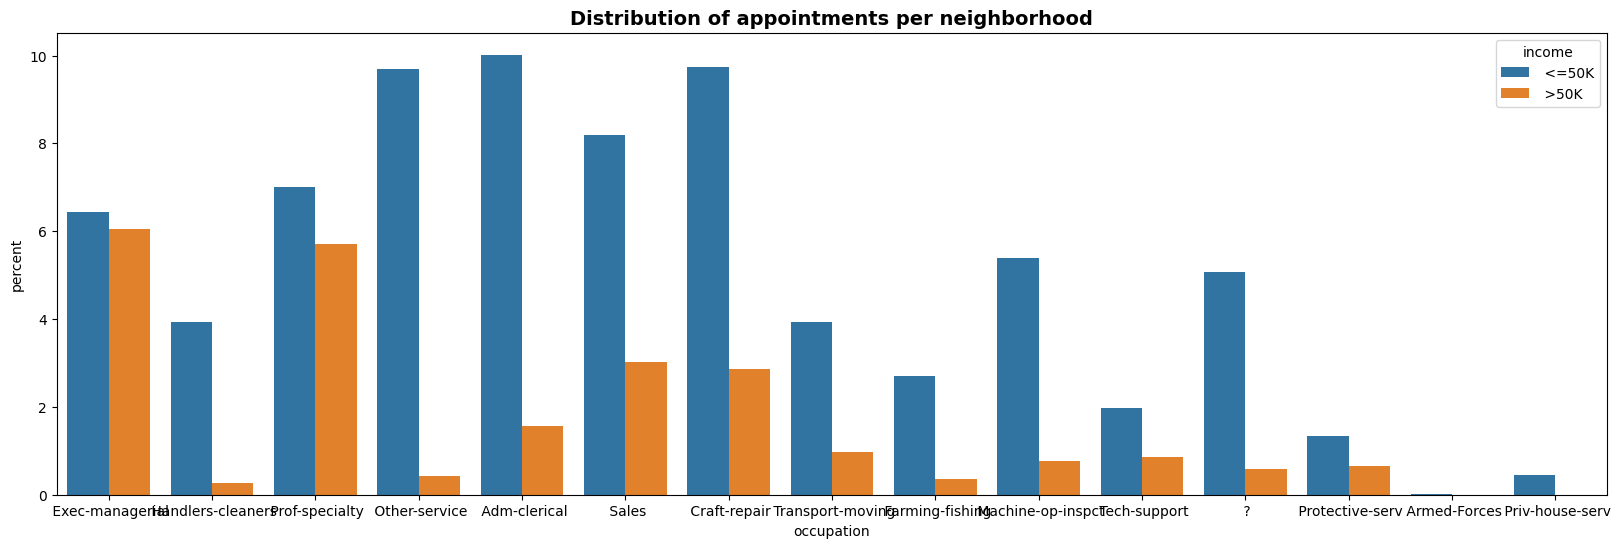

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(df, x='occupation',hue = 'income',stat='percent')
plt.title('Distribution of appointments per neighborhood', fontsize=14, fontweight='bold')
plt.show()

<Axes: xlabel='Percent', ylabel='education'>

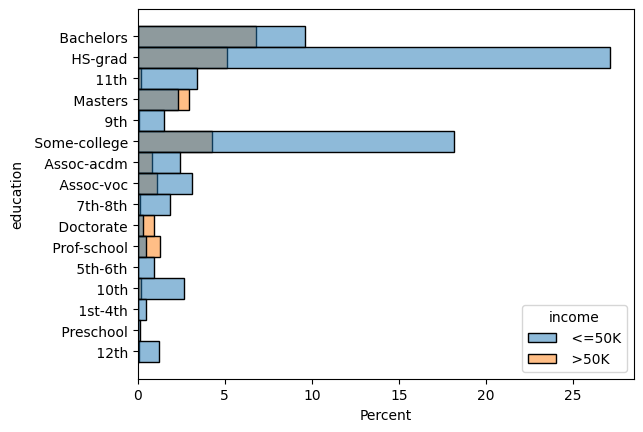

In [ ]:
sns.histplot(data=df, y="education",hue="income",stat='percent')

<ipython-input-27-7a75e995ac61>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hours-per-week'],kde=True,hist=True)


<Axes: xlabel='hours-per-week', ylabel='Density'>

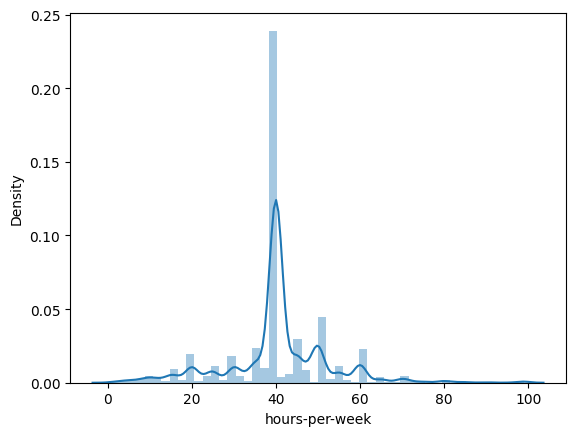

In [ ]:

sns.distplot(df['hours-per-week'],kde=True,hist=True)

<Axes: ylabel='occupation'>

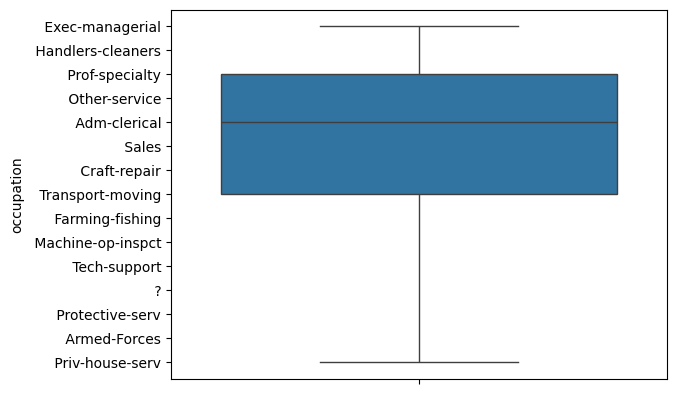

In [ ]:
sns.boxplot(df['occupation'])

BIvariate/Multivarieate Analysis -


1.   Scatterplot
2.   Barplot
3.   Boxplot
2.   Heatmap





<Axes: xlabel='hours-per-week', ylabel='age'>

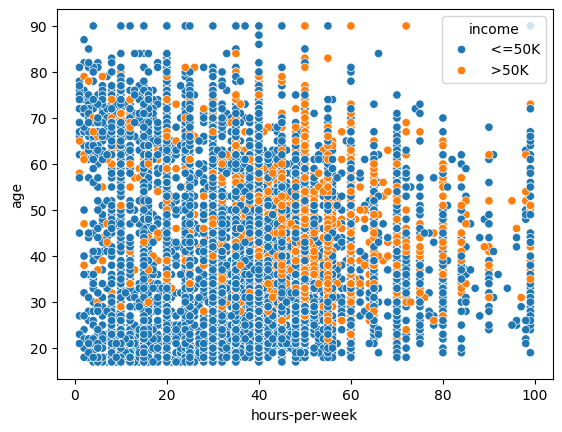

In [ ]:

sns.scatterplot(data=df,y='age',x='hours-per-week',hue='income')

<Axes: xlabel='age', ylabel='occupation'>

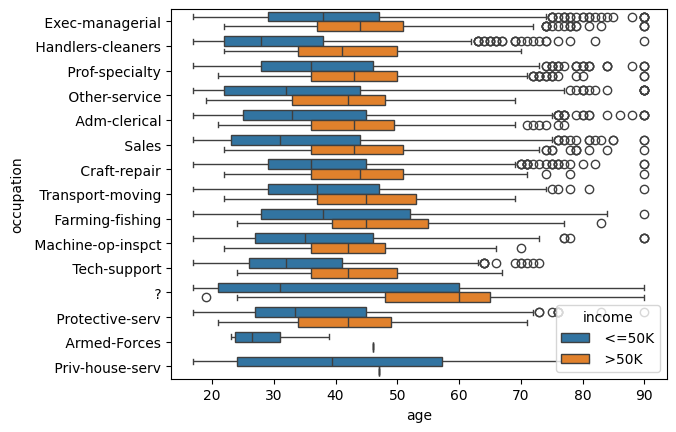

In [ ]:
sns.boxplot(data = df,x = 'age',y = 'occupation',hue=df['income'])

<Axes: xlabel='income', ylabel='occupation'>

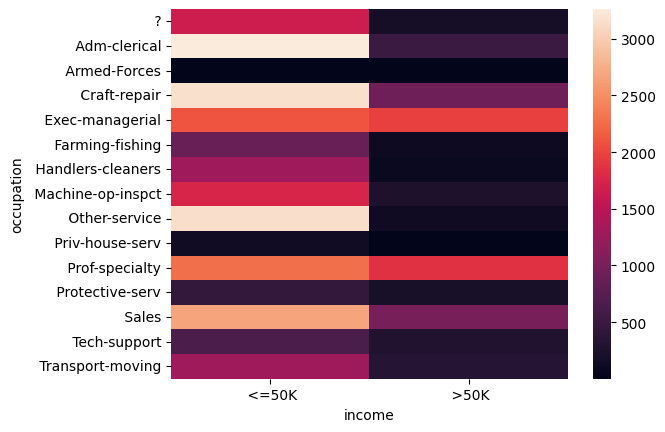

In [ ]:
sns.heatmap(pd.crosstab(df['occupation'],df['income']))

<Axes: xlabel='hours-per-week', ylabel='occupation'>

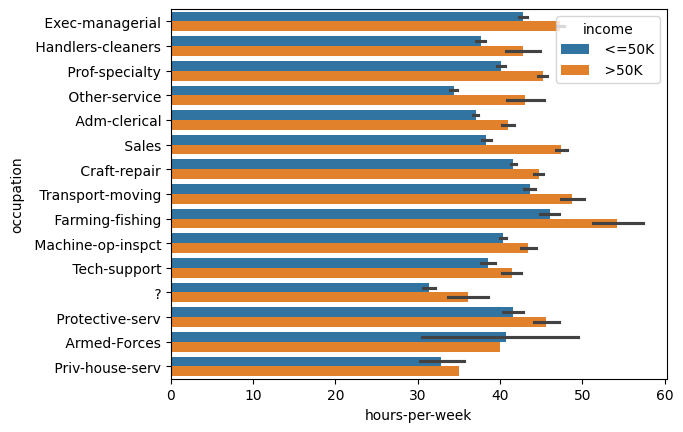

In [ ]:
sns.barplot(data=df,y='occupation',x='hours-per-week',hue='income')

NOW LET US DISCUS FURTHER FEATURE ENGG. PROCCES -



In [ ]:
# Handling categorical data - Applying column transformation on categorical data
df.sample(9)


,age,workclass,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4983,27,Private,HS-grad,Never-married,Craft-repair,Own-child,Male,0,0,40,United-States,<=50K
7119,47,Self-emp-not-inc,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,35,United-States,>50K
17112,67,Private,HS-grad,Widowed,Sales,Not-in-family,Female,0,0,32,United-States,<=50K
13049,19,Local-gov,Some-college,Never-married,Adm-clerical,Own-child,Male,0,0,15,United-States,<=50K
2332,35,Private,11th,Separated,Transport-moving,Not-in-family,Male,0,0,90,United-States,<=50K
4767,40,Federal-gov,Masters,Married-civ-spouse,Tech-support,Husband,Male,0,1902,40,Philippines,>50K
29343,20,Private,HS-grad,Never-married,Other-service,Own-child,Female,0,0,30,United-States,<=50K
22435,31,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,50,United-States,<=50K
353,59,?,Bachelors,Married-civ-spouse,?,Husband,Male,0,0,40,United-States,>50K


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(drop='first'),['workclass','education','marital-status','occupation','sex','relationship','native-country'])
    ],remainder='passthrough')

In [ ]:
X = df.drop(columns='income',axis=1)
# X = transformer.fit_transform(X)
y = df['income']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
X_train_transformed2 = transformer.fit_transform(X_train)
X_test_transformed2 = transformer.transform(X_test)


In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(X_train_transformed2)
X_train_transformed2 = scaler.transform(X_train_transformed2)
X_test_transformed2 = scaler.transform(X_test_transformed2)
X_train_transformed2.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.4040404 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.50505051],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.15151515],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.4040404 ],
       [0.        , 0.        , 0.        , ..., 0.01055011, 0.        ,
        0.3030303 ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.4040404 ]])

In [ ]:
scaler = StandardScaler(with_mean=False)


In [ ]:
scaler.fit(X_train_transformed2)
X_train_transformed2 = scaler.transform(X_train_transformed2)
X_test_transformed2 = scaler.transform(X_test_transformed2)



In [ ]:
X_train_transformed2 = X_train_transformed2.toarray()
X_test_transformed2 = X_test_transformed2.toarray()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 57)

X_train_transformed2 = pca.fit_transform(X_train_transformed2)
X_test_transformed2 = pca.transform(X_test_transformed2)

explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.03465931, 0.02382937, 0.0222867 , 0.02033046, 0.01734573,
       0.01670952, 0.01526701, 0.01449311, 0.01385653, 0.01361687,
       0.01337106, 0.01303868, 0.01266628, 0.0123994 , 0.01230049,
       0.01219377, 0.01200033, 0.01187575, 0.01182197, 0.01172032,
       0.011634  , 0.01152785, 0.0114464 , 0.01139188, 0.01135441,
       0.01121561, 0.01115901, 0.01106772, 0.01103231, 0.01099233,
       0.01093299, 0.010906  , 0.01082668, 0.01077021, 0.0107267 ,
       0.01070733, 0.01067723, 0.01066724, 0.01065331, 0.01064214,
       0.01063697, 0.01062391, 0.01060696, 0.01060538, 0.01059374,
       0.0105594 , 0.01055228, 0.01051854, 0.0105003 , 0.01047701,
       0.0104349 , 0.01041975, 0.01039491, 0.01031195, 0.01028241,
       0.01022096, 0.01018049])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))


Accuracy LR 0.8357375523499302
Accuracy DT 0.7888320148906468
